## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [12]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [13]:
tickers = ['RAD']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [14]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5358 entries, 1999-12-31 to 2021-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RAD     5358 non-null   float64
dtypes: float64(1)
memory usage: 83.7 KB


In [15]:
mydata.head()

,RAD
Date,
1999-12-31,222.5
2000-01-03,237.5
2000-01-04,227.5
2000-01-05,222.5
2000-01-06,215.0


In [16]:
mydata.tail()

,RAD
Date,
2021-04-13,19.420000
2021-04-14,19.049999
2021-04-15,17.690001
2021-04-16,17.639999
2021-04-19,18.350000


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [17]:
mydata.iloc[0]

RAD    222.5
Name: 1999-12-31 00:00:00, dtype: float64

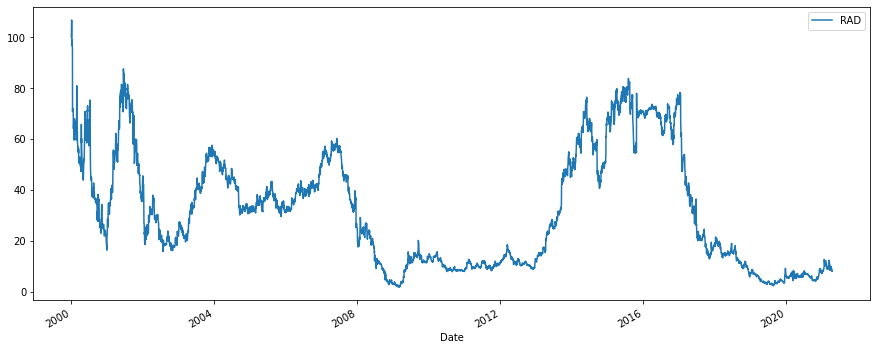

In [18]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [19]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,RAD
Date,
1999-12-31,NaN
2000-01-03,0.067416
2000-01-04,-0.042105
2000-01-05,-0.021978
2000-01-06,-0.033708


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [20]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [21]:
annual_returns = returns.mean() * 250
annual_returns

RAD    0.123616
dtype: float64

In [22]:
np.dot(annual_returns, weights)

ValueError: shapes (1,) and (5,) not aligned: 1 (dim 0) != 5 (dim 0)

Transform the result into a percentage form. 

In [ ]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

Is the return of this portfolio satisfactory?